# Adjustments for Time Series Data

The sequential nature of time series data necessitates a number of adjustments to the supervised learning techniques we have learned up to this point.

## What we will accomplish

In this notebook we will:
- Define the horizon of a forecast and
- Discuss adjustments to data splitting techniques for time series data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")
np.random.seed(440)

## Data split adjustments for time series

The temporal nature of time series data changes how we will approach data splits. When creating splits for time series you have to respect the sequence of observations, meaning that we cannot just randomly split the data as we have done up to this point. Random splits could result in us training a model on data points that have occurred after the points we are trying to predict, essentially using the future to predict the past, Great Scott!

### Train test and validation splits

In forecasting we typically have a set timeframe into the future that we would like to predict. The number of steps forward we want to be able to forecast, say $h$, is know as our forecast's <i>horizon</i>. 

In train test splits (or validation splits) for time series you set aside the last one, two or three horizon's worth of data for your test (or validation) set. To illustrate see this image with 12 observations.

<img src="time_train_test.png" width="80%"></img>

For a horizon of $h=2$ (or $h=4$) we set aside the last four red circles as our test set and use the first eight blue circles as our training set.

#### In python

Typically we do not need special functions or objects to do this for us. If our data is arranged according to observation we can make the split using simple indexing.

### Cross-validation

Cross-validation for forecasting works in much the same way as the train-test split described above. For each of the $k$ splits you incrementally add the next $h$ or $2h$ observations.

An example with $h=3$ and $k=5$ is shown below.

<img src="time_cv.png" width="100%"></img>

#### In python

Again we could implement this in python by hand, however, `sklearn` has a nice time series cross-validation object we can use instead called `TimeSeriesSplit`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html</a>.

In [2]:
## Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

We will demonstrate the use of `TimeSeriesSplit` on a fake time series array.

In [3]:
series = np.random.choice([-1,1], 100, replace=True).cumsum()

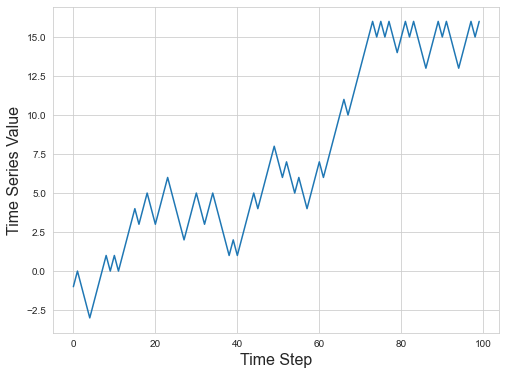

In [4]:
plt.figure(figsize=(8,6))

plt.plot(range(100),
            series)

plt.xlabel("Time Step", fontsize=16)
plt.ylabel("Time Series Value", fontsize=16)

plt.show()

In [5]:
## First we make a split object

## n_splits is the number of splits, here we use 5
## test_size limits the size of the holdout set, here we'll imagine 
## we are using a horizon of 14 (test_size=14)
kfold = TimeSeriesSplit(n_splits = 5,
                           test_size = 14)

In [6]:
## Now we can use this just like a kfold object

for train_index, test_index in kfold.split(series):
    print("TRAIN INDEX:", train_index)
    print("TEST INDEX:", test_index)
    print()
    print()

TRAIN INDEX: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
TEST INDEX: [30 31 32 33 34 35 36 37 38 39 40 41 42 43]


TRAIN INDEX: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
TEST INDEX: [44 45 46 47 48 49 50 51 52 53 54 55 56 57]


TRAIN INDEX: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
TEST INDEX: [58 59 60 61 62 63 64 65 66 67 68 69 70 71]


TRAIN INDEX: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
TEST INDEX: [72 73 74 75 76 77 78 79 80 81 82 83 84 85]


TRAIN INDEX: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 

That's it!

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)